<img src='https://upload.wikimedia.org/wikipedia/commons/d/d8/Deerfire_high_res_edit.jpg' width='1200px'/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Define-the-metrics" data-toc-modified-id="Define-the-metrics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define the metrics</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Load-and-describe-data" data-toc-modified-id="Load-and-describe-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load and describe data</a></span></li><li><span><a href="#Missing-value-treatment" data-toc-modified-id="Missing-value-treatment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Missing value treatment</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Univariate analysis</a></span><ul class="toc-item"><li><span><a href="#Independent-columns" data-toc-modified-id="Independent-columns-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Independent columns</a></span></li><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Categorical columns</a></span></li><li><span><a href="#Numerical-Columns" data-toc-modified-id="Numerical-Columns-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Numerical Columns</a></span></li></ul></li><li><span><a href="#Bivariate-analysis-with-our-target-variable" data-toc-modified-id="Bivariate-analysis-with-our-target-variable-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bivariate analysis with our target variable</a></span></li><li><span><a href="#Multivariate-analysis" data-toc-modified-id="Multivariate-analysis-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Multivariate analysis</a></span></li></ul></li><li><span><a href="#Outlier-treatment" data-toc-modified-id="Outlier-treatment-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Outlier treatment</a></span></li><li><span><a href="#Preparing-the-data-for-modelling" data-toc-modified-id="Preparing-the-data-for-modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Preparing the data for modelling</a></span></li><li><span><a href="#Baseline-model---Linear-Regression" data-toc-modified-id="Baseline-model---Linear-Regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Baseline model - Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Statistical-approach" data-toc-modified-id="Statistical-approach-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Statistical approach</a></span><ul class="toc-item"><li><span><a href="#Assumptions-of-linear-regression-in-statistics" data-toc-modified-id="Assumptions-of-linear-regression-in-statistics-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Assumptions of linear regression in statistics</a></span><ul class="toc-item"><li><span><a href="#Normality-of-the-residuals" data-toc-modified-id="Normality-of-the-residuals-9.1.1.1"><span class="toc-item-num">9.1.1.1&nbsp;&nbsp;</span>Normality of the residuals</a></span></li></ul></li></ul></li><li><span><a href="#Machine-learning-approach" data-toc-modified-id="Machine-learning-approach-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Machine learning approach</a></span></li></ul></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Data transformation</a></span></li><li><span><a href="#Improving-Stats-model" data-toc-modified-id="Improving-Stats-model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Improving Stats model</a></span></li><li><span><a href="#Improving-ML-model" data-toc-modified-id="Improving-ML-model-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Improving ML model</a></span></li></ul></div>

## Objective 

Forest fires help in the natural cycle of woods' growth and replenishment. They Clear dead trees, leaves, and competing vegetation from the forest floor, so new plants can grow. Remove weak or disease-ridden trees, leaving more space and nutrients for stronger trees.


But when fires burn too hot and uncontrollable or when they’re in the “wildland-urban interface” (the places where woodlands and homes or other developed areas meet), they can be damaging and life threatning.


In this kernel, our aim is to predict the burned area (`area`) of forest fires, in the northeast region of Portugal. Based on the the spatial, temporal, and weather variables where the fire is spotted. 

This prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation.

Further read:
1. [Mylandplan](https://mylandplan.org/content/good-and-bad-forest-fires)
2. [KNIME](https://www.knime.com/knime-applications/forest-fire-prediction)

In [3]:
target = 'area'

## Define the metrics

**RMSE** 

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that error are unbiased and follow a normal distribution.

Further read: https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/

## Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import statsmodels.api as sm
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

## Load and describe data

In [6]:
#local path = 'forestfires.csv'
path = "../input/forest-fires-data-set/forestfires.csv"
df = pd.read_csv(path)

In [7]:
df.shape

(517, 13)

In [8]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


## Missing value treatment

In [10]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## Exploratory Data Analysis
   We will try out the following analysis on our dataset
   - Univariate 
   - Bivariate 
   - Multivariate

In [11]:
plt.rcParams["figure.figsize"] = 9,5

### Univariate analysis



Let's begin with the target variable, `Area`

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


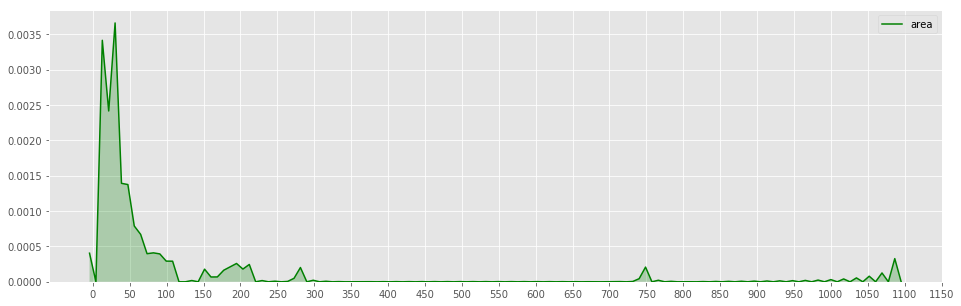

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df[target].skew()))
print("Kurtosis: {}".format(df[target].kurtosis()))
ax = sns.kdeplot(df[target],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

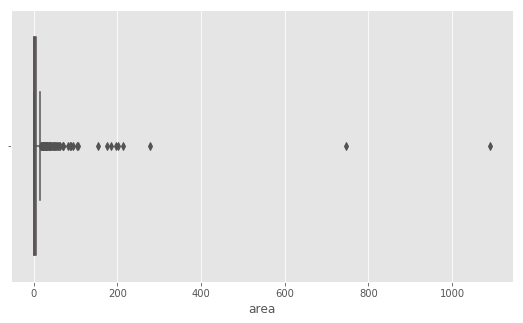

In [13]:
ax = sns.boxplot(df[target])

**Few observations:**

- The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

- It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

- We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

- Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

In [14]:
df[target].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [15]:
y_outliers = df[abs(zscore(df[target])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


#### Independent columns 

In [16]:
dfa = df.drop(columns=target)
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

#### Categorical columns 

#### Numerical Columns

### Bivariate analysis with our target variable

In [17]:
df['area'].describe(), y_outliers

(count     517.000000
 mean       12.847292
 std        63.655818
 min         0.000000
 25%         0.000000
 50%         0.520000
 75%         6.570000
 max      1090.840000
 Name: area, dtype: float64,
      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
 237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
 238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
 415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
 479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53)

In [18]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


### Multivariate analysis

In [19]:
# pairplot 

# heatmap


## Outlier treatment

## Preparing the data for modelling
Thing which we can cover here
- Encoding the categorical columns 
- Scaling the columns using Normalization or Standardization
- Data transformations like log,inverse,exponential,etc

## Baseline model - Linear Regression

**Difference between statistical and machine learning approach**

- Machine learning produces **predictions**.  As far as I can tell, it is not very good at drawing conclusions about general principles based on a set of observations.
- Statistical estimation lets the practitioner make **inferences** (conclusions about a larger set of phenomena based on the observation of a smaller set of phenomena.)  For example, in a regression model the practitioner can estimate the effect of a one unit change in an independent variable x on a dependent variable y.

Further read: https://www.quora.com/When-do-you-use-machine-learning-vs-statistical-regression

In [21]:
#train test split

### Statistical approach

In [22]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y)

#### Assumptions of linear regression in statistics

##### Normality of the residuals

### Machine learning approach

In [23]:
# Basic model

## Data transformation

In [24]:
# When to use transformation


## Improving Stats model

In [25]:
# Using p-value and variable inflation factor

## Improving ML model

In [26]:
# Feature Selection techniques - Lasso Ridge ElasticNet



In [27]:
# Further tuning using
# Randomsearch and Gridsearch